Plot perbandingan kurva error telah dibuat dan disimpan sebagai 'comparative_error_curve.png'


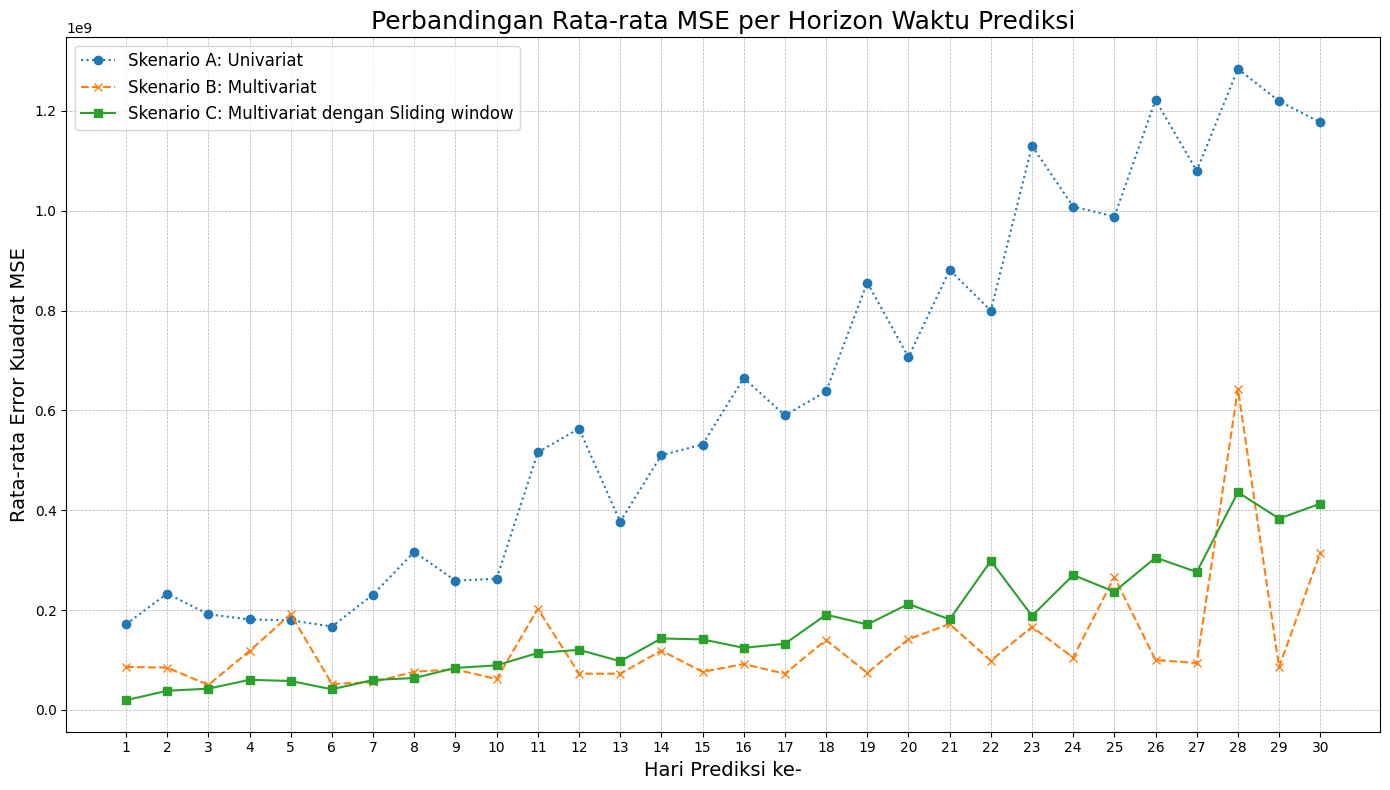

In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np

# 1. PERSIAPAN DATA: Menyimpan data teks mentah ke dalam variabel string
# Data untuk Skenario C (Multivariat Sliding)
data_mw_text = """Hari_Prediksi_ke,Rata_rata_Error_Kuadrat
1,19559144.57
2,38344051.79
3,42617202.36
4,60356550.31
5,57943912.04
6,41314832.70
7,59938722.64
8,63948899.67
9,84118396.34
10,89326877.42
11,114147744.53
12,120360798.70
13,97620313.71
14,143147096.91
15,141275126.14
16,124347085.41
17,132604139.40
18,190826829.62
19,171236914.84
20,212289921.01
21,181243262.98
22,298665151.98
23,188506094.14
24,270209025.23
25,236820345.98
26,305162873.83
27,276323756.44
28,436048629.88
29,383319302.22
30,413270384.68
"""

# Data untuk Skenario B (Multivariat)
data_mnw_text = """Hari_Prediksi_ke,Error_Kuadrat
1,86064480.0
2,84668750.0
3,50138452.0
4,118067224.0
5,191814050.0
6,52052188.0
7,55515296.0
8,76592180.0
9,81373950.0
10,61643200.0
11,202644380.0
12,72668700.0
13,72543690.0
14,118888136.0
15,76224920.0
16,91973450.0
17,72526470.0
18,140204460.0
19,74268620.0
20,141635950.0
21,172074910.0
22,98595360.0
23,166472110.0
24,104810190.0
25,266480030.0
26,99890740.0
27,94064100.0
28,643228500.0
29,85908340.0
30,314650500.0
"""

# Data untuk Skenario A (Univariat)
data_unw_text = """Hari_Prediksi_ke,MSE (USD^2)
1,171600384.00
2,233123424.00
3,191729184.00
4,181237120.00
5,179592944.00
6,167052688.00
7,231159504.00
8,316746464.00
9,258974288.00
10,262942608.00
11,516026496.00
12,563607424.00
13,377031424.00
14,510397440.00
15,531728352.00
16,664922816.00
17,590024896.00
18,638135872.00
19,856324928.00
20,706813952.00
21,881256256.00
22,800157056.00
23,1129872640.00
24,1008440640.00
25,988524928.00
26,1221920128.00
27,1080112128.00
28,1284308224.00
29,1219719936.00
30,1177241856.00
"""

# 2. MEMBACA DATA: Menggunakan io.StringIO dan Pandas untuk mengubah teks menjadi DataFrame
df_mw = pd.read_csv(io.StringIO(data_mw_text))
df_mnw = pd.read_csv(io.StringIO(data_mnw_text))
df_unw = pd.read_csv(io.StringIO(data_unw_text))

# Menyamakan nama kolom error agar konsisten
df_mw.rename(columns={'Rata_rata_Error_Kuadrat': 'MSE'}, inplace=True)
df_mnw.rename(columns={'Error_Kuadrat': 'MSE'}, inplace=True)
df_unw.rename(columns={'MSE (USD^2)': 'MSE'}, inplace=True)

# 3. VISUALISASI: Membuat plot perbandingan menggunakan Matplotlib
plt.figure(figsize=(14, 8))

# Plotting setiap skenario dengan gaya yang berbeda agar mudah dibedakan
plt.plot(df_unw['Hari_Prediksi_ke'], df_unw['MSE'], label='Skenario A: Univariat', marker='o', linestyle=':')
plt.plot(df_mnw['Hari_Prediksi_ke'], df_mnw['MSE'], label='Skenario B: Multivariat', marker='x', linestyle='--')
plt.plot(df_mw['Hari_Prediksi_ke'], df_mw['MSE'], label='Skenario C: Multivariat dengan Sliding window', marker='s', linestyle='-')

# Memberikan judul dan label pada grafik untuk kejelasan
plt.title('Perbandingan Rata-rata MSE per Horizon Waktu Prediksi', fontsize=18)
plt.xlabel('Hari Prediksi ke-', fontsize=14)
plt.ylabel('Rata-rata Error Kuadrat MSE', fontsize=14)
plt.xticks(np.arange(1, 31, 1)) # Memastikan semua hari muncul di sumbu-x
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Menggunakan notasi ilmiah untuk sumbu-y agar angka tidak terlalu panjang
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tight_layout()

# 4. MENYIMPAN GAMBAR: Menyimpan hasil plot ke dalam sebuah file
plt.savefig('comparative_error_curve.png')

print("Plot perbandingan kurva error telah dibuat dan disimpan sebagai 'comparative_error_curve.png'")